### Are there any age or gender or topic based correlations by location in the posts? `(Todd)`

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import LogNorm

In [49]:
df = pd.read_csv('../Datasets/Master_Dataset_GeoTopic.csv')

# set the width of the 'Narrative' column to 100 characters
pd.options.display.max_colwidth = 100

In [5]:
df.columns

Index(['Unnamed: 0', 'Story Primary ID', 'Story ID', 'User Primary ID',
       'User ID', 'Gender', 'Age', 'Title', 'Narrative', 'Media',
       'Account Created Date', 'Date (No Timestamp)', 'Interest',
       'Narrative LangDetect', 'Narrative TikaDetect', 'Clean Narrative',
       'translated_text', 'GeoTopic Name', 'GeoTopic Latitude',
       'GeoTopic Longitude'],
      dtype='object')

In [50]:
# replace df with your original DataFrame
df = df.loc[:, ["Gender", "Age", "Interest", "GeoTopic Name"]]

In [7]:
# df.sample(20)[['Narrative', 'GeoTopic Name', 'GeoTopic Latitude', 'GeoTopic Longitude']]
df.sample(10)

,Gender,Age,Interest,GeoTopic Name
20044,male,12,current affairs,NaN
21318,male,21,udaipur murder,NaN
58580,male,61,west and east,East Azerbaijan Province
23585,female,16,"bts, kpop, webtoon, Entertainment, check it out, on air, kpop culture",Hope
27886,male,34,"sport, f1, formula 1, fia, michael masi",NaN
35978,NaN,25,"joe biden, russia, foreign policy, ukraine",Russian Federation
7453,others,13,"new york city, crime, news",NaN
74917,NaN,18,cricket and math enthusiast,NaN
27494,male,34,"tennis, masters 1000, monte carlo, stefanos tsitsipas, alejandro davidovich fokina",NaN
15958,others,25,diabetes,NaN


In [51]:
# df = df.rename(columns={'GeoTopic Name': 'Location'})
df['Gender'] = df['Gender'].astype(str)
df['Age'] = df['Age'].astype(int)
df['Interest'] = df['Interest'].astype(str)
df['GeoTopic Name'] = df['GeoTopic Name'].astype(str)

In [52]:
# Replace negative values with their absolute value
df['Age'] = np.abs(df['Age'])

# Replace values greater than 80 with 80
df['Age'] = np.where(df['Age'] > 80, 80, df['Age'])

In [53]:
df_AgeLocation = df.loc[:, ["Age", "GeoTopic Name"]]
df_GenderLocation = df.loc[:, ["Gender", "GeoTopic Name"]]
df_InterestLocation = df.loc[:, ["Interest", "GeoTopic Name"]]

In [57]:
# remove rows with 'GeoTopic Name' of 'nan'
df_AgeLocation = df_AgeLocation[df_AgeLocation['GeoTopic Name'] != 'nan']

In [56]:
# Create Smaller more-workable samples:
df_AgeLocation = df_AgeLocation.iloc[:1000]
df_GenderLocation = df_GenderLocation.iloc[:1000]
df_InterestLocation = df_InterestLocation.iloc[:1000]

In [58]:
df_AgeLocation.sample(20)

,Age,GeoTopic Name
1838,47,Japan
253,24,Paris
1567,50,Sacramento
375,49,Islamic Republic of Pakistan
1623,47,Callander
1744,47,England
222,24,United Kingdom of Great Britain and Northern Ireland
2048,57,North Dakota
1797,47,United Kingdom of Great Britain and Northern Ireland
1112,44,Commonwealth of Australia


### Correlations
Age vs Location
- 
Gender vs Location
- Pie Charts
    - Male Pie Chart
    - Female Pie CHart
Interest vs Location
- 


# Age vs Location

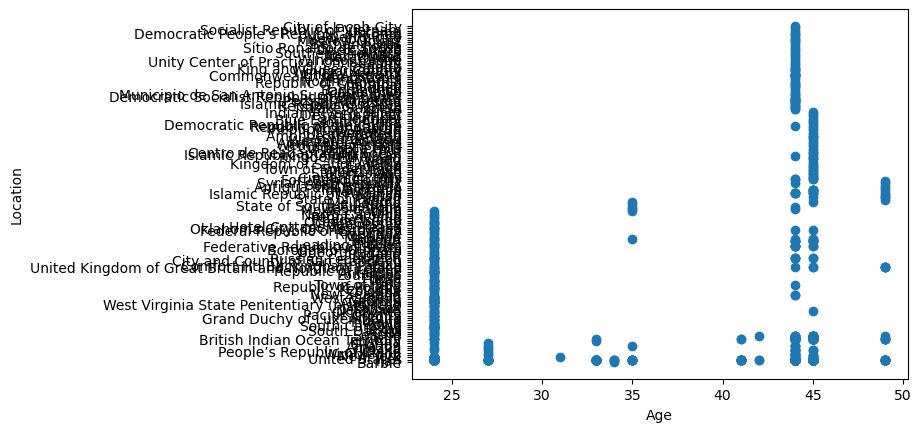

In [8]:
# plot the scatter plot
plt.scatter(df_AgeLocation['Age'], df_AgeLocation['GeoTopic Name'])
plt.xlabel('Age')
plt.ylabel('Location')
plt.show()

NameError: name 'norm' is not defined

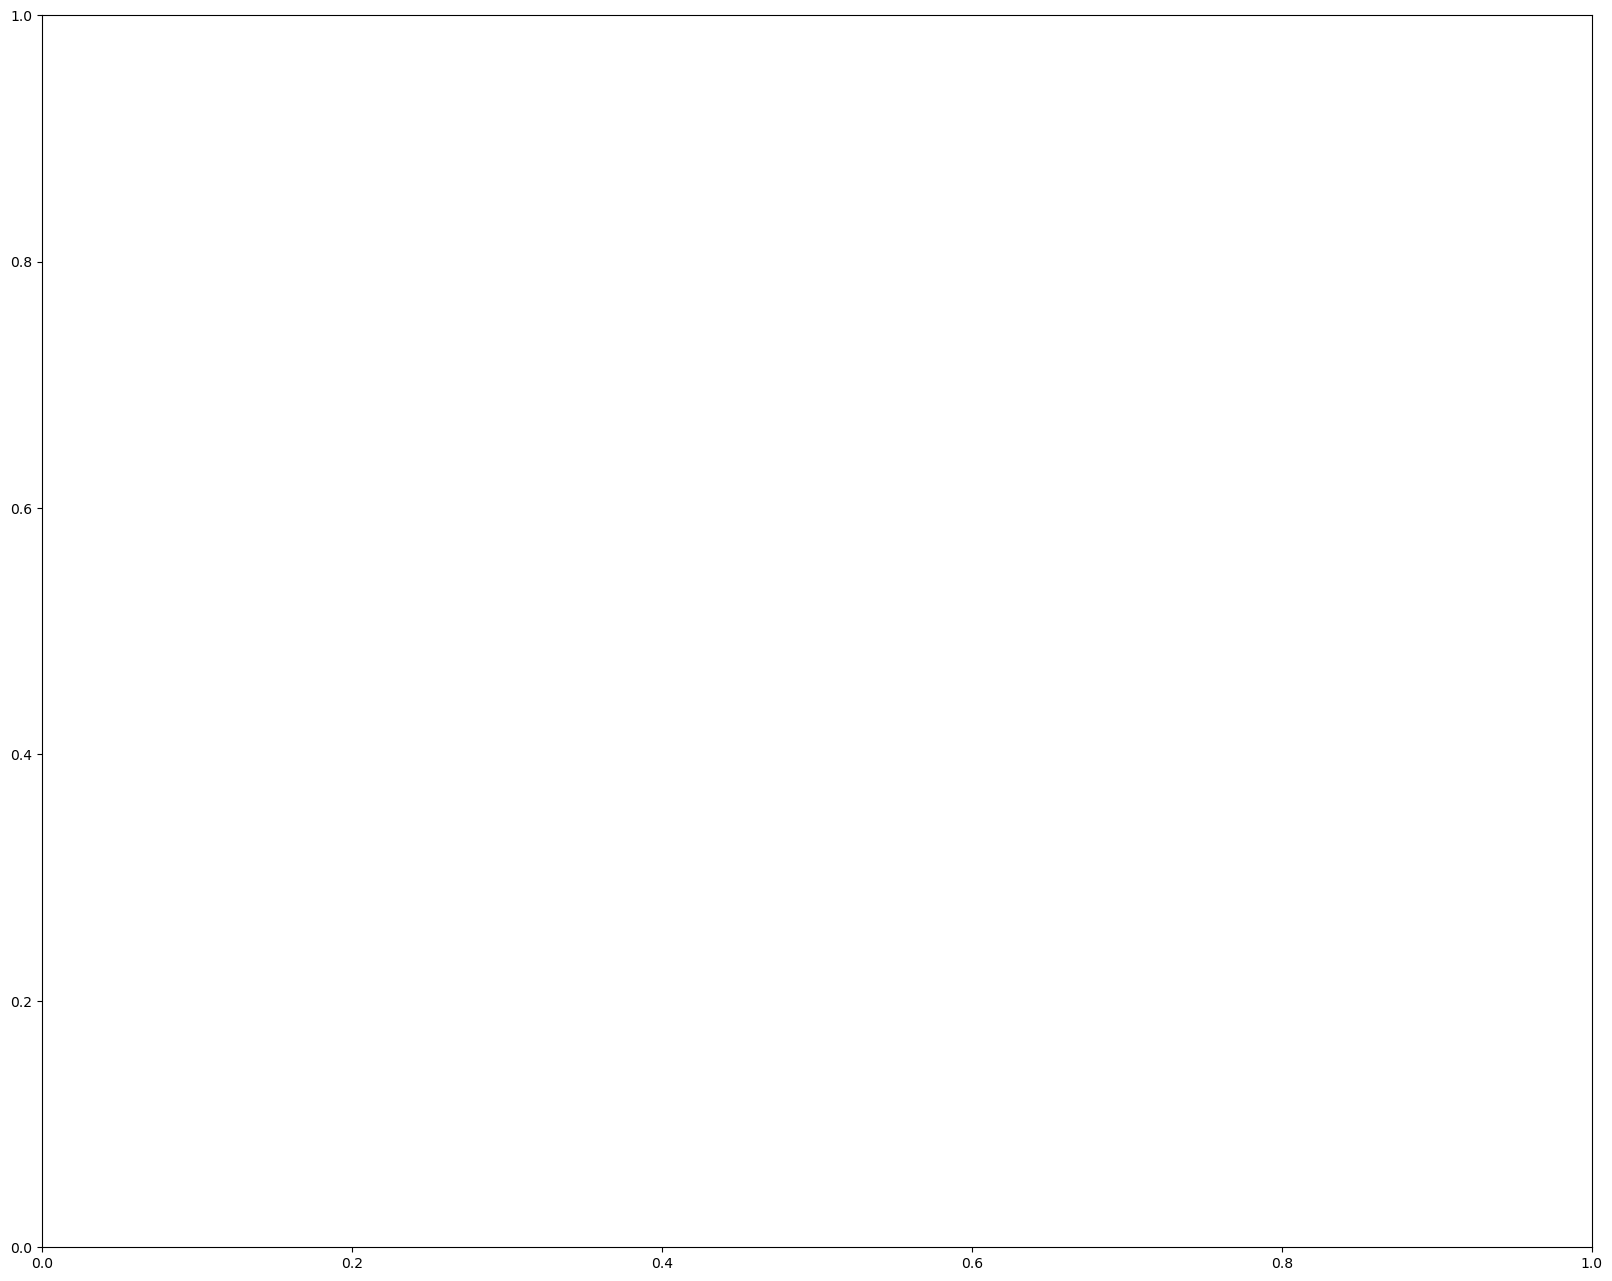

In [43]:
# create a pivot table
pivot_table = df_AgeLocation.pivot_table(index='Age', columns='GeoTopic Name', aggfunc=len, fill_value=0)

fig, ax = plt.subplots(figsize=(20, 16))
# create a logarithmic color scale
# norm = LogNorm(vmin=pivot_table.min(), vmax=pivot_table.max())
# create the heatmap
sns.heatmap(pivot_table, annot=True, cmap='RdBu', norm=norm)
plt.show()

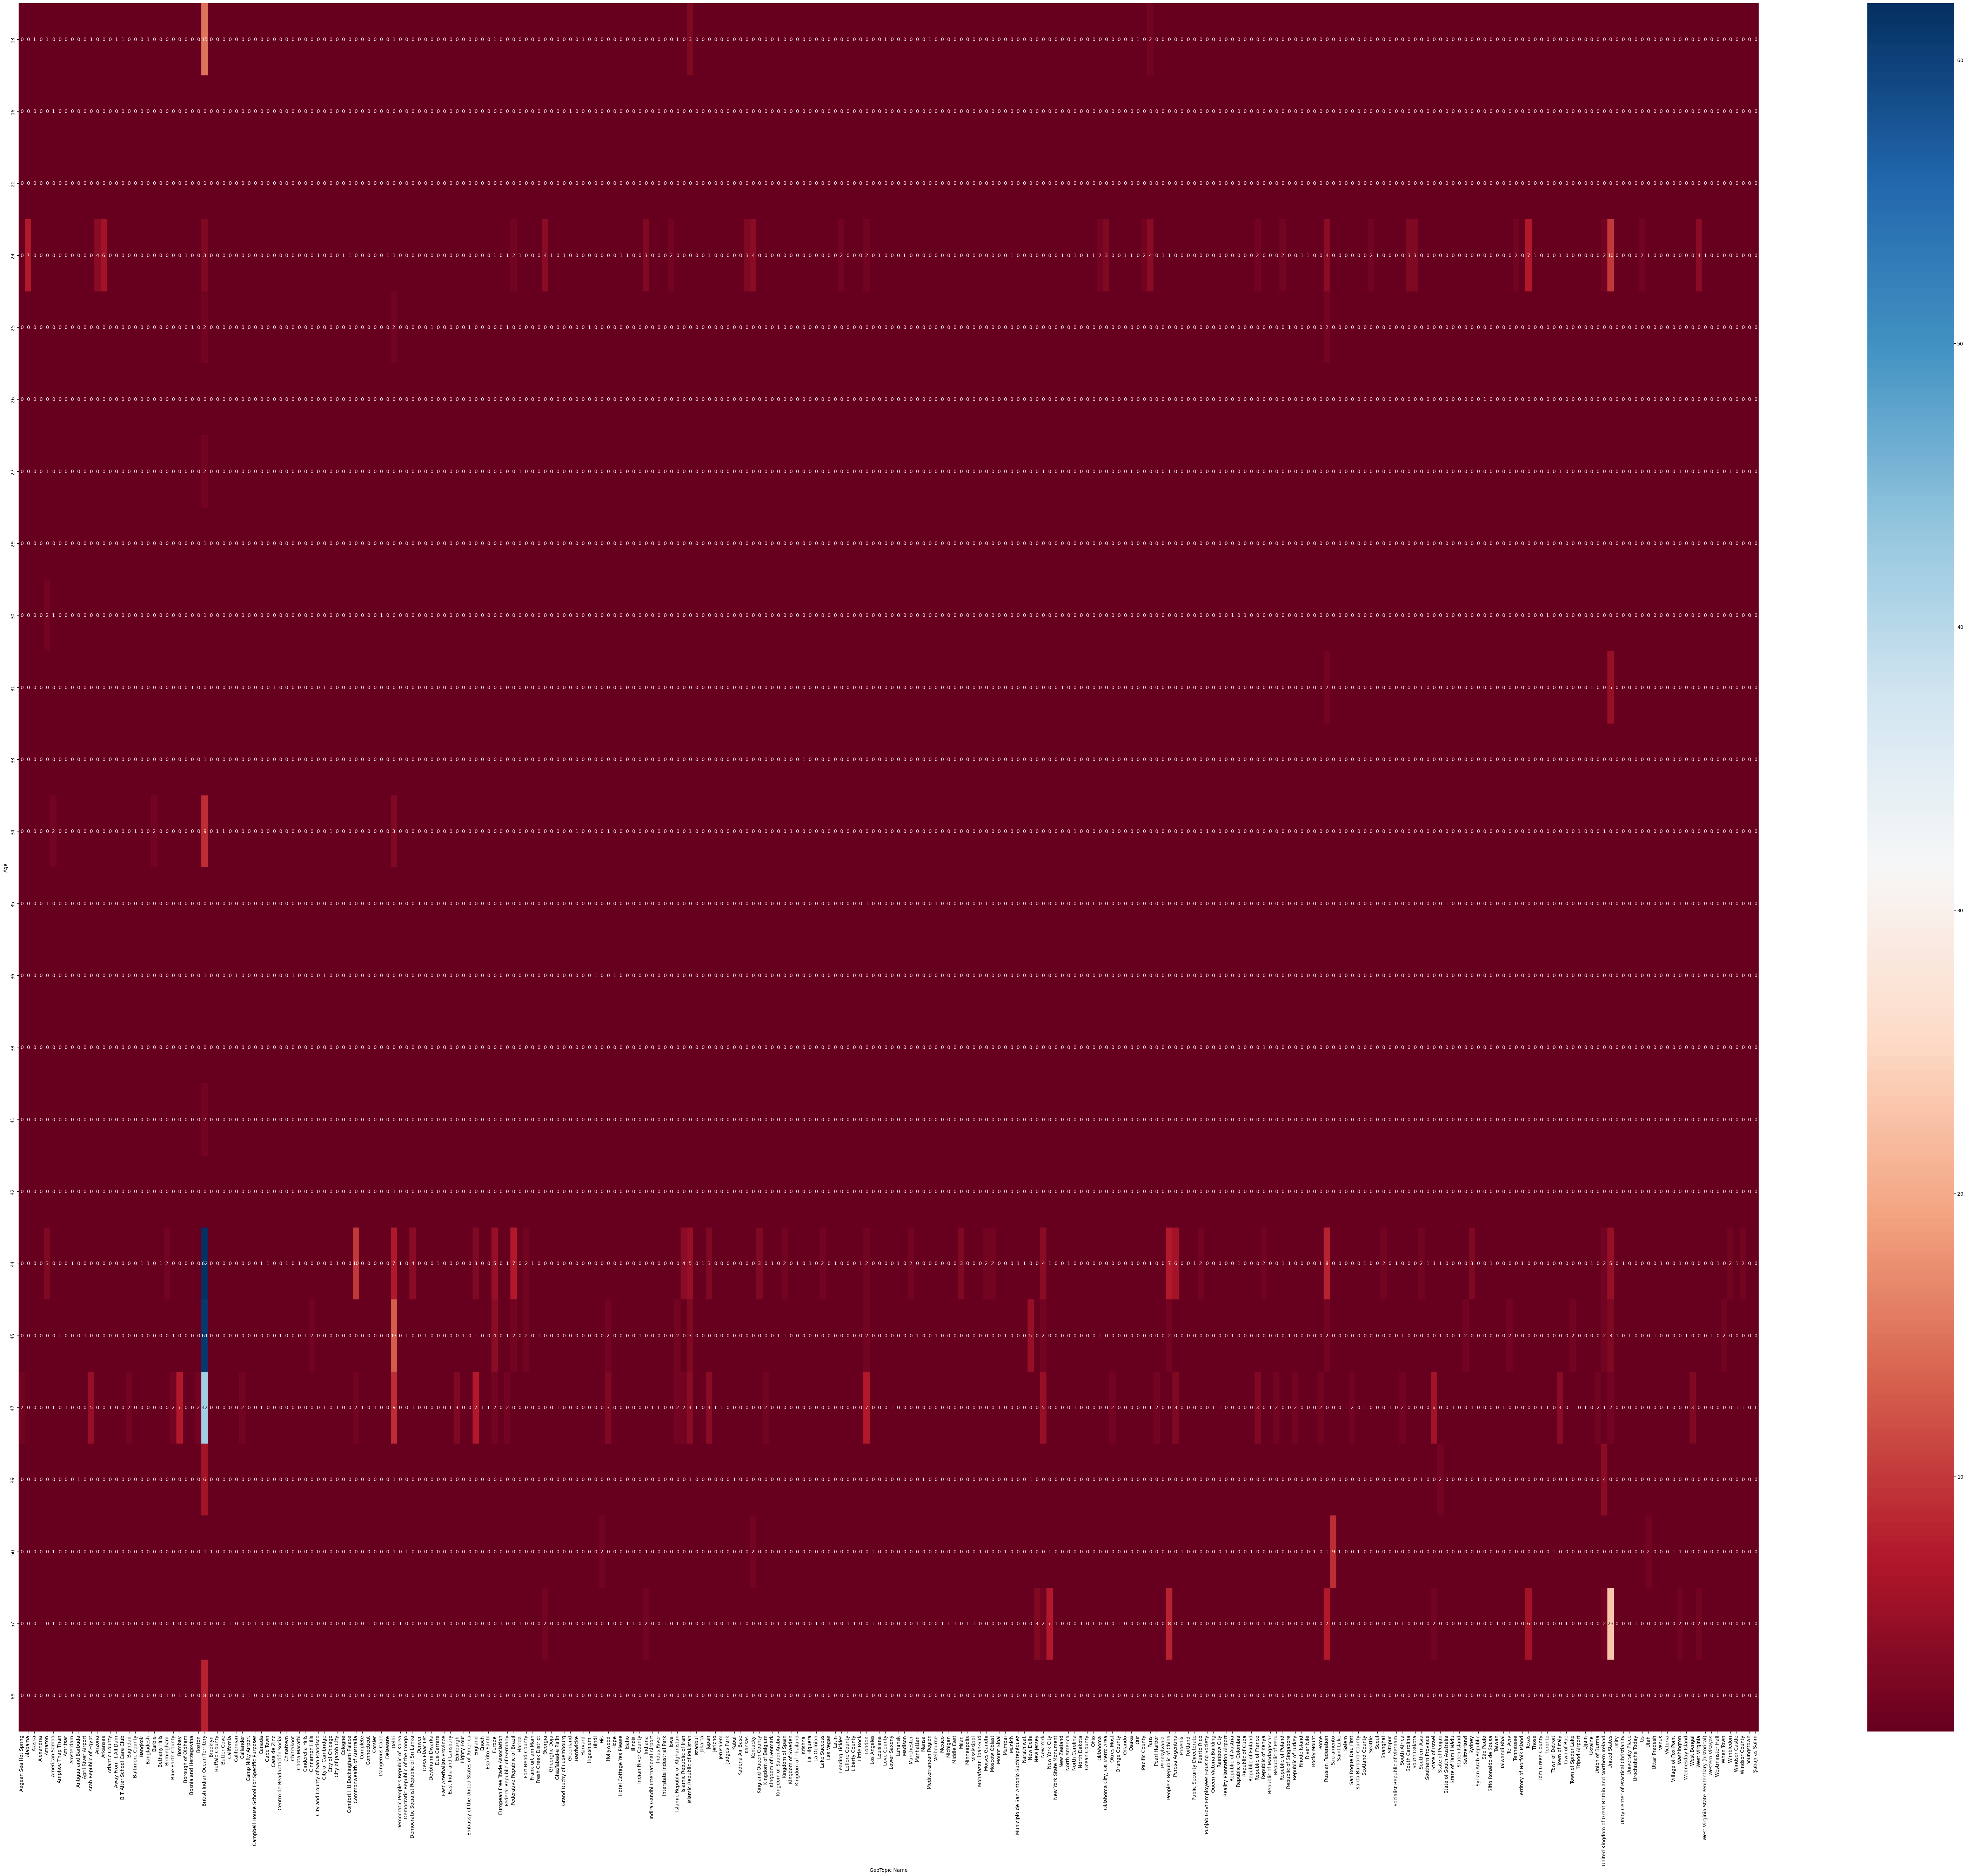

In [60]:
# create a pivot table
pivot_table = df_AgeLocation.pivot_table(index='Age', columns='GeoTopic Name', aggfunc=len, fill_value=0)

# create a heatmap
# sns.heatmap(pivot_table, annot=True, cmap='Blues')
# sns.heatmap(pivot_table, annot=True, cmap='Blues', vmin=1, vmax=pivot_table.values.max())
# create a heatmap with blue to red color scheme
fig, ax = plt.subplots(figsize=(80, 64))
sns.heatmap(pivot_table, annot=True, cmap='RdBu', vmin=1, vmax=pivot_table.values.max())
# plt.show()
# create a logarithmic color scale
# norm = LogNorm(vmin=pivot_table.min().min(), vmax=pivot_table.max().max())
# create the heatmap
# sns.heatmap(pivot_table, annot=True, cmap='RdBu', norm=norm)
plt.show()

KeyboardInterrupt: 

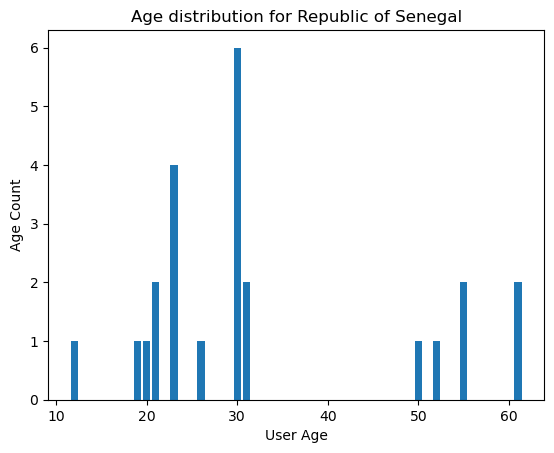

In [13]:
# Individual GeoTopic Location Bar Graphs

# Loop through each GeoTopic Name
for geo in df_AgeLocation['GeoTopic Name'].unique():
    # Get the age counts for this GeoTopic Name
    age_counts = df[df['GeoTopic Name'] == geo]['Age'].value_counts().sort_index()

    # Create a bar chart using matplotlib
    fig, ax = plt.subplots()
    ax.bar(age_counts.index, age_counts.values)

    # Set the chart title and axes labels
    ax.set_title('Age distribution for ' + geo)
    ax.set_xlabel('User Age')
    ax.set_ylabel('Age Count')

    # Save the chart as a PNG image
    fig.savefig('q1_figures/' + geo + '.png')

    # Close the figure to free up memory
    plt.close(fig)

In [ ]:
# Overlapping Bar Graphs

# Get a list of unique GeoTopic Names
geos = df['GeoTopic Name'].unique()

# Create a figure with a single subplot
fig, ax = plt.subplots()

# Loop through each GeoTopic Name
for i, geo in enumerate(geos):
    # Get the age counts for this GeoTopic Name
    age_counts = df[df['GeoTopic Name'] == geo]['Age']

    # Filter the data to exclude any ages greater than 80
    age_counts = age_counts[age_counts <= 80]

    # Calculate the mean and standard deviation for this GeoTopic Name
    mean = age_counts.mean()
    std = age_counts.std()

    # Filter the data to exclude any points more than 2 standard deviations away from the mean
    age_counts_filtered = age_counts[(age_counts >= mean - 2*std) & (age_counts <= mean + 2*std)]

    # Set the bar width
    width = 0.35

    # Set the x position of the bars
    x_pos = i * width

    # Create a bar chart using matplotlib
    ax.bar(age_counts_filtered.unique() + x_pos, age_counts_filtered.value_counts(), width, label=geo)

# Set the chart title and axes labels
ax.set_title('Age distributions for multiple countries')
ax.set_xlabel('Age')
ax.set_ylabel('Count')

# Set the x-ticks and x-tick labels
ax.set_xticks(df['Age'].unique())
ax.set_xticklabels(df['Age'].unique())

# Set the x-axis limits
ax.set_xlim(0, 80)

# Add a legend to the chart
ax.legend()

# Save the chart as a PNG image
fig.savefig('q1_figures/multiple_countries_filtered.png')

# Close the figure to free up memory
plt.close(fig)

# Gender vs Location

# Interest vs Location